In [31]:
import itertools
from pprint import pprint
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import copy
import time
from scipy import special
import matplotlib
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
from multisoc.infer import data_loader
from multisoc.infer import aux_functions
from multisoc.infer import inference

### Parameters

In [4]:
bad_comms = [48, 1] ## schools with bad data

In [9]:
data_path = "../../multidimensional_homophily/Datasets/AddHealth" ## Change by the path to the AddHealth dataset

### Computations

In [30]:
f_f_out_deg = {}
m_f_out_deg = {}
f_m_out_deg = {}
m_m_out_deg = {}

f_f_in_deg = {}
m_f_in_deg = {}
f_m_in_deg = {}
m_m_in_deg = {}

f_out_deg = {}
m_out_deg = {}
f_in_deg = {}
m_in_deg = {}

for school in range(1,85): ## For tests
    t0 = time.time()
    if school in bad_comms:
        continue
#     try:
    nodes_list,edges_list = data_loader.load_AddHealth(school, 
                                                       th_sex = 20, 
                                                       th_race= 20, 
                                                       th_grade= 20, 
                                                       school= None, 
                                                       remove_unreported=True,
                                                       data_path = data_path
                                                      )
#     except: print('Error')
    if len(nodes_list['sex'].cat.categories)==1 or len(nodes_list['race'].cat.categories)==1:
        print('There is only one sex category or only one race category: we skip it')
    elif nodes_list.shape[0]<100:
        print('There are less than 100 students in this school: we skip it')
    else:
        for index, row in edges_list.iterrows():
    
            s = row["source"]
            t = row["target"]
        
            s_lbl = str(school) + "_" + s
            t_lbl = str(school) + "_" + t
            
            if row["source sex"] == "Female":

                if s_lbl in f_out_deg:
                    f_out_deg[s_lbl] +=1
                else:
                    f_out_deg[s_lbl] = 1
                
                if row["target sex"] == "Female":
                    if s_lbl in f_f_out_deg:
                        f_f_out_deg[s_lbl] += 1
                    else:
                        f_f_out_deg[s_lbl] = 1
                        
                elif row["target sex"] == "Male":
                    if s_lbl in f_m_out_deg:
                        f_m_out_deg[s_lbl] += 1
                    else:
                        f_m_out_deg[s_lbl] = 1
                        
                else:
                    print ("WTF NOOO1")
                    
            elif row["source sex"] == "Male":

                if s_lbl in m_out_deg:
                    m_out_deg[s_lbl] +=1
                else:
                    m_out_deg[s_lbl] = 1
                
                if row["target sex"] == "Female":
                    if s_lbl in m_f_out_deg:
                        m_f_out_deg[s_lbl] += 1
                    else:
                        m_f_out_deg[s_lbl] = 1
                        
                elif row["target sex"] == "Male":
                    if s_lbl in m_m_out_deg:
                        m_m_out_deg[s_lbl] += 1
                    else:
                        m_m_out_deg[s_lbl] = 1
                        
                else:
                    print ("WTF NOOO1")
            else:
                print ("WTF NOOO")
        
        
            if row["target sex"] == "Female":

                if t_lbl in f_in_deg:
                    f_in_deg[t_lbl] +=1
                else:
                    f_in_deg[t_lbl] = 1
                
                if row["source sex"] == "Female":
                    if t_lbl in f_f_in_deg:
                        f_f_in_deg[t_lbl] += 1
                    else:
                        f_f_in_deg[t_lbl] = 1
                        
                elif row["source sex"] == "Male":
                    if t_lbl in f_m_in_deg:
                        f_m_in_deg[t_lbl] += 1
                    else:
                        f_m_in_deg[t_lbl] = 1
                        
                else:
                    print ("WTF NOOO1")
                    
            elif row["target sex"] == "Male":

                if t_lbl in m_in_deg:
                    m_in_deg[t_lbl] +=1
                else:
                    m_in_deg[t_lbl] = 1
                
                if row["source sex"] == "Female":
                    if t_lbl in m_f_in_deg:
                        m_f_in_deg[t_lbl] += 1
                    else:
                        m_f_in_deg[t_lbl] = 1
                        
                elif row["source sex"] == "Male":
                    if t_lbl in m_m_in_deg:
                        m_m_in_deg[t_lbl] += 1
                    else:
                        m_m_in_deg[t_lbl] = 1
                        
                else:
                    print ("WTF NOOO1")
                    
            else:
                print ("WTF NOOO")
            

C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #2: one school
There is only one sex category or only one race category: we skip it
Community #3: one school
There are less than 100 students in this school: we skip it
Community #4: 2 schools
There is only one sex category or only one race category: we skip it
Community #5: one school
There is only one sex category or only one race category: we skip it
Community #6: one school
There is only one sex category or only one race category: we skip it
Community #7: 2 schools
Community #8: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #9: one school
Community #10: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #11: 2 schools
Community #12: 1 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #13: 2 schools
Community #14: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #15: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #16: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #17: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #18: one school
Community #19: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #20: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #21: one school
There is only one sex category or only one race category: we skip it
Community #22: one school
Community #23: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #24: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #25: one school
Community #26: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #27: one school
There is only one sex category or only one race category: we skip it
Community #28: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #29: one school
Community #30: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #31: 2 schools
Community #32: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #33: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #34: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #35: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #36: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #37: 2 schools
Community #38: one school
Community #39: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #40: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #41: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #42: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #43: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #44: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #45: 2 schools
Community #46: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #47: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #49: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #50: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #51: 2 schools
Community #52: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #53: 2 schools
Community #54: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #55: one school
Community #56: one school
Community #57: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #58: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #59: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #60: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #61: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #62: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #63: one school
There is only one sex category or only one race category: we skip it
Community #64: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #65: 2 schools
Community #66: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #67: one school
Community #68: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #69: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #70: one school
There are less than 100 students in this school: we skip it
Community #71: one school
There are less than 100 students in this school: we skip it
Community #72: one school
Community #73: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #74: one school
Community #75: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #76: one school
There is only one sex category or only one race category: we skip it
Community #77: one school
There are less than 100 students in this school: we skip it
Community #78: one school
Community #79: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #80: one school
Community #81: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #82: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #83: one school


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


Community #84: 2 schools


In [15]:
# source_counts = edges_list.groupby(['source', 'source sex']).size().reset_index(name='count') ## Alternative method to compute degrees

C:\Users\csh_samu\AppData\Local\Temp\ipykernel_25156\17534069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  source_counts = edges_list.groupby(['source', 'source sex']).size().reset_index(name='count')


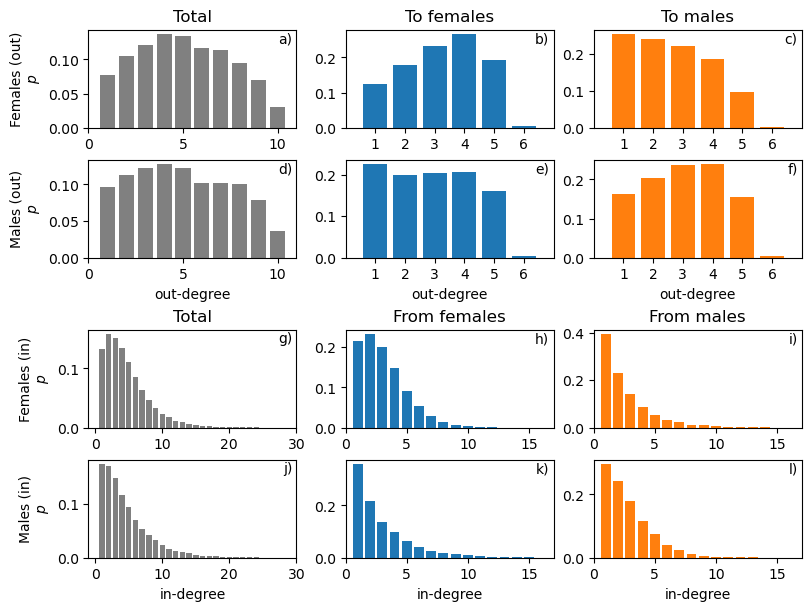

In [114]:
fig, axs = plt.subplots(4, 3, figsize=(8,6),layout="constrained")

#######################################################

plt.sca(axs[0,0])
plt.title("Total")
plt.ylabel("Females (out)\n$p$")
plt.xlim(0,11)
x, y  = zip(*Counter(f_out_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="grey")
axs[0,0].text(
    0.98, 0.98,  # Position: near the top right
    "a)",  # Label text
    transform=axs[0,0].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

plt.sca(axs[0,1])
plt.title("To females")
plt.xlim(0,7)
plt.xticks(range(1,7))
x, y  = zip(*Counter(f_f_out_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="C0")
axs[0,1].text(
    0.98, 0.98,  # Position: near the top right
    "b)",  # Label text
    transform=axs[0,1].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

plt.sca(axs[0,2])
plt.title("To males")
plt.xlim(0,7)
plt.xticks(range(1,7))
x, y  = zip(*Counter(f_m_out_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="C1")
axs[0,2].text(
    0.98, 0.98,  # Position: near the top right
    "c)",  # Label text
    transform=axs[0,2].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

#######################################################

plt.sca(axs[1,0])
# plt.title("Total")
plt.ylabel("Males (out)\n$p$")
plt.xlim(0,11)
x, y  = zip(*Counter(m_out_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="grey")
plt.xlabel("out-degree")
axs[1,0].text(
    0.98, 0.98,  # Position: near the top right
    "d)",  # Label text
    transform=axs[1,0].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

plt.sca(axs[1,1])
# plt.title("To females")
plt.xlim(0,7)
plt.xticks(range(1,7))
x, y  = zip(*Counter(m_f_out_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="C0")
plt.xlabel("out-degree")
axs[1,1].text(
    0.98, 0.98,  # Position: near the top right
    "e)",  # Label text
    transform=axs[1,1].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

plt.sca(axs[1,2])
plt.xlim(0,7)
plt.xticks(range(1,7))
x, y  = zip(*Counter(m_m_out_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="C1")
plt.xlabel("out-degree")
axs[1,2].text(
    0.98, 0.98,  # Position: near the top right
    "f)",  # Label text
    transform=axs[1,2].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

#######################################################
#######################################################

plt.sca(axs[2,0])
plt.ylabel("Females (in)\n$p$")
plt.title("Total")
plt.xlim(-1,30)
x, y  = zip(*Counter(f_in_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="grey")
axs[2,0].text(
    0.98, 0.98,  # Position: near the top right
    "g)",  # Label text
    transform=axs[2,0].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

plt.sca(axs[2,1])
plt.title("From females")
plt.xlim(0,17)
x, y  = zip(*Counter(f_f_in_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="C0")
axs[2,1].text(
    0.98, 0.98,  # Position: near the top right
    "h)",  # Label text
    transform=axs[2,1].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

plt.sca(axs[2,2])
plt.title("From males")
plt.xlim(0,17)
x, y  = zip(*Counter(f_m_in_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="C1")
axs[2,2].text(
    0.98, 0.98,  # Position: near the top right
    "i)",  # Label text
    transform=axs[2,2].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

#######################################################

plt.sca(axs[3,0])
plt.ylabel("Males (in)\n$p$")
plt.xlim(-1,30)
plt.xlabel("in-degree")
x, y  = zip(*Counter(m_in_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="grey")
axs[3,0].text(
    0.98, 0.98,  # Position: near the top right
    "j)",  # Label text
    transform=axs[3,0].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

plt.sca(axs[3,1])
plt.xlim(0,17)
plt.xlabel("in-degree")
x, y  = zip(*Counter(m_f_in_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="C0")
axs[3,1].text(
    0.98, 0.98,  # Position: near the top right
    "k)",  # Label text
    transform=axs[3,1].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

plt.sca(axs[3,2])
plt.xlim(0,17)
plt.xlabel("in-degree")
x, y  = zip(*Counter(m_m_in_deg.values()).items())
y = y/np.sum(y)
plt.bar(x,y,color="C1")
axs[3,2].text(
    0.98, 0.98,  # Position: near the top right
    "l)",  # Label text
    transform=axs[3,2].transAxes,  # Use Axes coordinates (0,0 is bottom-left, 1,1 is top-right)
    verticalalignment='top',  # Align to the top
    horizontalalignment='right',  # Align to the right
)

#######################################################

# plt.constrained_layout()
plt.savefig("./figures/degree_distributions.pdf")
plt.savefig("./figures/degree_distributions.png",dpi=600)
plt.show()

## Sanity checks

In [73]:
m_out_deg

{'7_2': 9,
 '7_5': 9,
 '7_9': 7,
 '7_13': 3,
 '7_15': 7,
 '7_18': 4,
 '7_19': 2,
 '7_20': 2,
 '7_22': 5,
 '7_26': 8,
 '7_28': 6,
 '7_29': 9,
 '7_31': 5,
 '7_32': 7,
 '7_36': 3,
 '7_43': 3,
 '7_50': 7,
 '7_51': 9,
 '7_54': 2,
 '7_57': 3,
 '7_62': 5,
 '7_66': 8,
 '7_67': 6,
 '7_71': 10,
 '7_74': 3,
 '7_79': 9,
 '7_80': 4,
 '7_81': 8,
 '7_84': 8,
 '7_85': 2,
 '7_88': 4,
 '7_93': 7,
 '7_97': 2,
 '7_99': 4,
 '7_101': 5,
 '7_104': 3,
 '7_107': 7,
 '7_109': 5,
 '7_112': 7,
 '7_113': 8,
 '7_114': 8,
 '7_117': 6,
 '7_122': 6,
 '7_123': 9,
 '7_125': 5,
 '7_126': 7,
 '7_128': 10,
 '7_131': 9,
 '7_136': 7,
 '7_138': 2,
 '7_141': 3,
 '7_144': 9,
 '7_149': 1,
 '7_150': 7,
 '7_152': 1,
 '7_154': 5,
 '7_155': 5,
 '7_158': 7,
 '7_159': 7,
 '7_161': 8,
 '7_162': 1,
 '7_164': 1,
 '7_166': 4,
 '7_170': 3,
 '7_172': 3,
 '7_174': 10,
 '7_175': 1,
 '7_176': 5,
 '7_179': 3,
 '7_181': 1,
 '7_182': 5,
 '7_184': 4,
 '7_186': 8,
 '7_187': 9,
 '7_192': 5,
 '7_193': 9,
 '7_198': 4,
 '7_200': 6,
 '7_202': 3,
 '7_204

In [74]:
nodes_list,edges_list = data_loader.load_AddHealth(11,
                                                       th_sex = 20, 
                                                       th_race= 20, 
                                                       th_grade= 20, 
                                                       school= None, 
                                                       remove_unreported=True,
                                                       data_path = data_path
                                                      )

Community #11: 2 schools


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\MultiSocInter\multidimensional_social_interactions_paper\multisoc\infer\data_loader.py:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  nodes_list.replace({'sex': sex,'race':race,'grade':grade},inplace=True)


In [75]:
edges_list[edges_list["source"] == "352"]

,source,target,activities,source sex,target sex,source race,target race,source grade,target grade
1622,352,272,3,Male,Female,White,White,7th,7th
1623,352,294,1,Male,Male,White,White,7th,7th
1624,352,302,1,Male,Female,White,White,7th,7th
1625,352,311,5,Male,Male,White,White,7th,7th
1626,352,337,2,Male,Female,White,White,7th,7th
1627,352,338,5,Male,Male,White,White,7th,8th
1628,352,339,3,Male,Male,White,White,7th,7th
1629,352,396,6,Male,Male,White,White,7th,7th
1630,352,417,2,Male,Female,White,White,7th,8th
1631,352,418,1,Male,Female,White,White,7th,7th
